# Project: Indian Unicorn Startups 2023

## Project Objectives: To Evaluate the following

### 1. Top 5 Sectors with Highest Valuations?

### 2. Top 5 Companies with Highest Valuations?

### 3. Top 5 Companies belongs to which Sector?

### 4. Top 10 Companies and their Location?

### 5. Date of Entry of Top 10 companies?

### 6. Number of Startups Year-wise?

### 7. Investors with the Highest Valuations?

### 8. Comapnies with least valuations?

In [1]:
# IMPORTING THE RELEVANT LIBRARIES 

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# READING THE FILE

In [4]:
ius = pd.read_csv('Indian Unicorn startups 2023 updated.csv', index_col = 0) # To use built-in index of csv file

In [5]:
#CHECKING HOW LARGE THE DATA IS

In [6]:
ius.shape

(102, 7)

In [7]:
# EXAMINING THE CONTENTS OF THE RESULTANT DATAFRAME

In [8]:
ius.head() # displaying the top 5 rows

,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
No.,,,,,,,
1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


In [9]:
# EXAMINING THE DESCRIPTIVE STATISTICS OF THE DATA

In [10]:
ius.describe()

,Entry Valuation^^ ($B),Valuation ($B)
count,102.000000,102.000000
mean,1.547549,3.398020
std,1.138013,4.710657
min,1.000000,0.568000
25%,1.000000,1.200000
50%,1.200000,1.850000
75%,1.582500,3.475000
max,10.000000,37.600000


In [11]:
# EXAMINING THE CONCISE SUMMARY OF THE DATAFRAME

In [12]:
ius.info() #checks for any missing values and data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 1 to 102
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 102 non-null    object 
 1   Sector                  102 non-null    object 
 2   Entry Valuation^^ ($B)  102 non-null    float64
 3   Valuation ($B)          102 non-null    float64
 4   Entry                   102 non-null    object 
 5   Location                102 non-null    object 
 6   Select Investors        102 non-null    object 
dtypes: float64(2), object(5)
memory usage: 6.4+ KB


In [13]:
# CHECKING FOR ANY NULL VALUES

In [14]:
ius.isnull().sum()

Company                   0
Sector                    0
Entry Valuation^^ ($B)    0
Valuation ($B)            0
Entry                     0
Location                  0
Select Investors          0
dtype: int64

## 1. Top 5 Sectors with Highest Valuations

In [90]:
# Using group by finding the top 5 sectors with highest valuations

sector_valuation=ius.groupby('Sector')['Valuation ($B)'].sum().reset_index()
top_5_sectors = sector_valuation.sort_values(by='Valuation ($B)',ascending=False).head(5)
top_5_sectors

,Sector,Valuation ($B)
12,E-Commerce,44.1
19,Edtech,28.6
36,Foodtech,16.1
34,Fintech - Payments & Wallet,16.0
32,Fintech - Payments,14.8


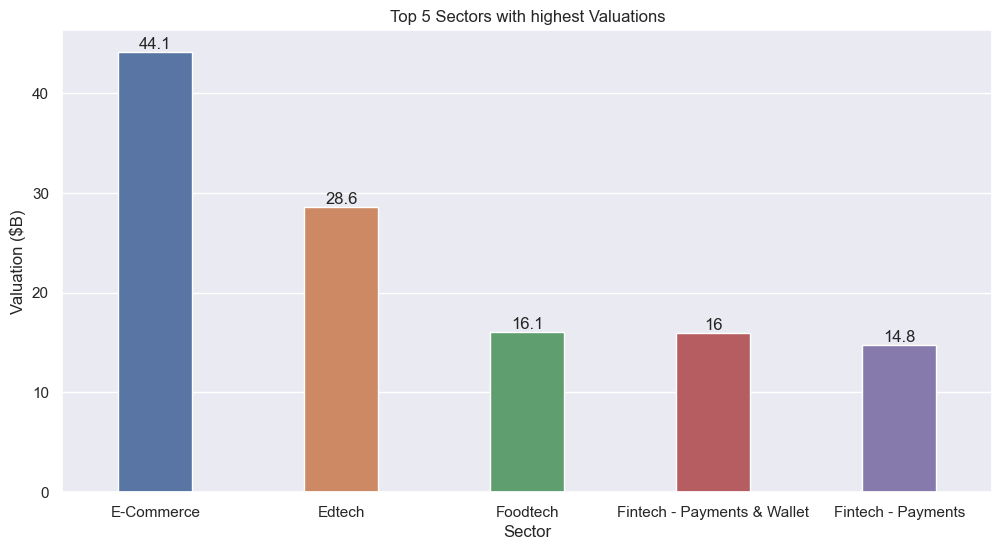

In [136]:
# Setting the style and labeling the plot
sns.set(style='darkgrid')  
plt.figure(figsize=(12,6))
plt.title('Top 5 Sectors with highest Valuations')

# grouping data by sector and calculating the valuation
sector_valuation=ius.groupby('Sector')['Valuation ($B)'].sum().reset_index()

# sorting the data in descending order and displaying the top 5 results
top_5_sectors = sector_valuation.sort_values(by='Valuation ($B)',ascending=False).head(5)

# creating a bar plot using seaborn
ax=sns.barplot(data=top_5_sectors, x='Sector', y='Valuation ($B)', width=0.4)  

# labeling the bars 
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.yaxis


#### From the above plot we can see that E-commerce sector is having the highest valuation followed by edtech and so on

## 2. Top 5 companies with Highest Valuations

In [89]:
# using group by finding the top 5 companies with highest valuations

company_valuation=ius.groupby('Company')['Valuation ($B)'].sum().reset_index()
top_5_companies= company_valuation.sort_values(by='Valuation ($B)',ascending=False).head(5)
top_5_companies

,Company,Valuation ($B)
31,Flipkart^,37.6
3,BYJUS,22.0
69,PayTM^,16.0
71,PhonePe^,12.0
89,Swiggy,10.7


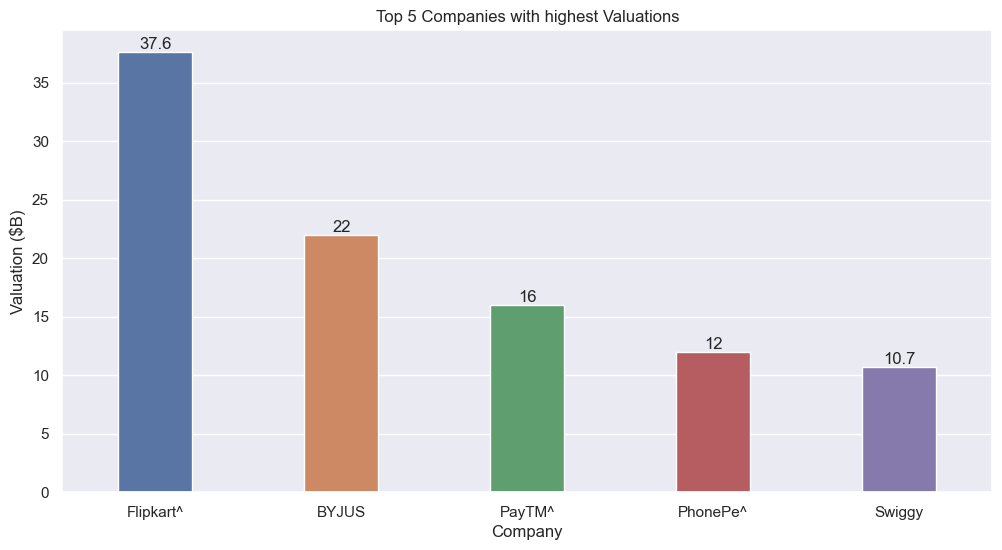

In [135]:
# Setting the style and labeling the plot
sns.set(style='darkgrid')
plt.figure(figsize=(12,6))
plt.title('Top 5 Companies with highest Valuations')

# grouping data by company and calculating the valuation
company_valuation=ius.groupby('Company')['Valuation ($B)'].sum().reset_index()

# sorting the data in descending order and displaying the top 5 results
top_5_companies=company_valuation.sort_values(by='Valuation ($B)',ascending=False).head(5)

# creating a bar plot using seaborn
ax=sns.barplot(data=top_5_companies, x='Company', y='Valuation ($B)', width=0.4)

# labeling the bars 
for bars in ax.containers:
    ax.bar_label(bars)





#### From the above plot we can see that flipkart company has the highest valuation followed by BYJU'S and so on

## 3. Top 5 companies belongs to which Sectors

In [253]:
# using group by finding the top 5 company-sector combination by highest valuations

company_sector= ius.groupby(['Company','Sector'])['Valuation ($B)'].sum().reset_index()
company_secotor_5 = company_sector.sort_values(by='Valuation ($B)',ascending=False).head(5)
company_secotor_5

,Company,Sector,Valuation ($B)
31,Flipkart^,E-Commerce,37.6
3,BYJUS,Edtech,22.0
69,PayTM^,Fintech - Payments & Wallet,16.0
71,PhonePe^,Fintech - Payments,12.0
89,Swiggy,Foodtech,10.7


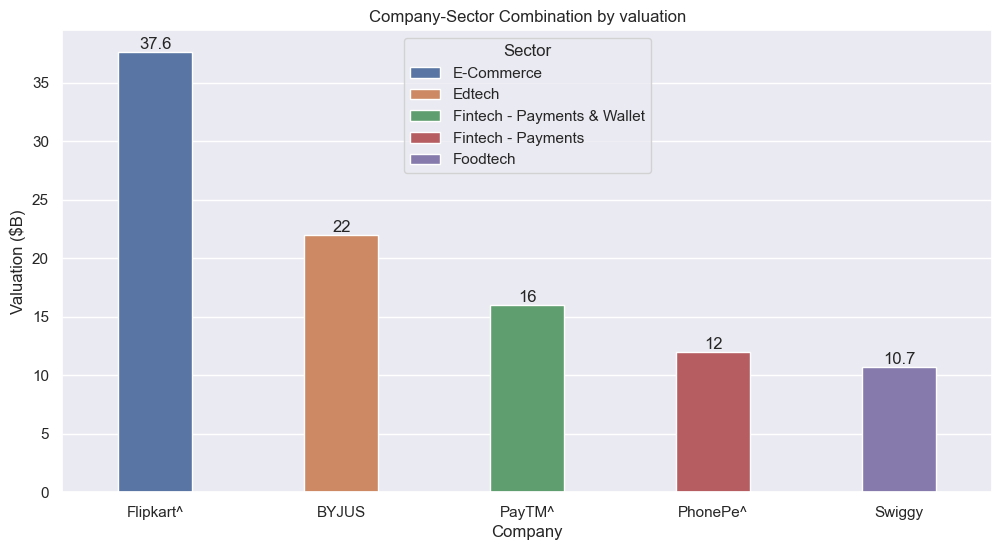

In [134]:
# Setting the style and labeling the plot

sns.set(style='darkgrid')
plt.figure(figsize=(12,6))
plt.title('Company-Sector Combination by valuation')

# grouping data by company-sector combination with highest valuation
comapny_sector=ius.groupby(['Company','Sector'])['Valuation ($B)'].sum().reset_index()

#sorting the data in descending order and displaying the top 5 results
company_sector_5=company_sector.sort_values(by='Valuation ($B)',ascending=False).head(5)

# creating a bar plot using seaborn
ax=sns.barplot(data=company_sector_5, x='Company', y='Valuation ($B)', hue='Sector', dodge=False, width=0.4)

# labeling the bars 
for bars in ax.containers:
    ax.bar_label(bars)

#### From the above plot we can see that the company with highest valuation belongs to E-commerce sector and so on

## 4. Top 10 Companies and their Location

In [142]:
# using group by finding the top 10 company-location combination by highest valuations

company_location=ius.groupby(['Company','Location'])['Valuation ($B)'].sum().reset_index()
company_location_10 = company_location.sort_values(by='Valuation ($B)', ascending=False).head(5)
company_location_10

,Company,Location,Valuation ($B)
31,Flipkart^,Bangalore/Singapore,37.6
3,BYJUS,Bangalore,22.0
69,PayTM^,Noida,16.0
71,PhonePe^,Bangalore,12.0
89,Swiggy,Bangalore,10.7


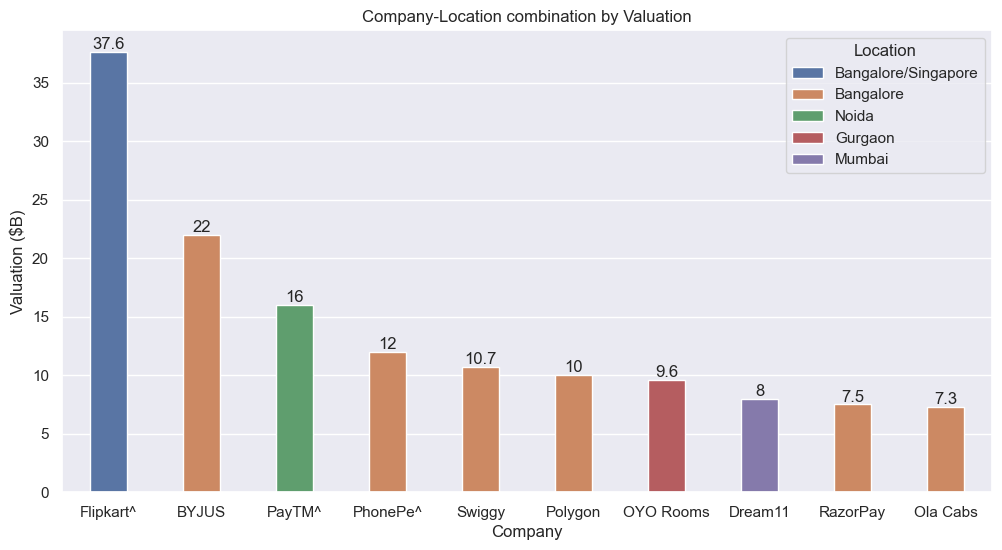

In [141]:
# Setting the style and labeling the plot

sns.set(style='darkgrid')
plt.figure(figsize=(12,6))
plt.title('Company-Location combination by Valuation')

# grouping data by company-location combination by highest valuation
company_location=ius.groupby(['Company','Location'])['Valuation ($B)'].sum().reset_index()

#sorting the data in descending order and displaying the top 10 results
company_location_10 = company_location.sort_values(by='Valuation ($B)',ascending=False).head(10)

# creating a bar plot using seaborn
ax=sns.barplot(data=company_location_10, x='Company', y='Valuation ($B)', hue='Location', width=0.4, dodge=False)

# labeling the bars 
for bars in ax.containers:
    ax.bar_label(bars)


#### From the above plot we can see that most of the companies have their headquaters in Banglore

## 5. Date of Entry of Top 10 Companies

In [145]:
# using group by finding the top 10 company-date entry combination by highest valuations
company_entry=ius.groupby(['Company','Entry'])['Valuation ($B)'].sum().reset_index()
company_entry_10=company_entry.sort_values(by='Valuation ($B)', ascending=False).head(10)
company_entry_10

,Company,Entry,Valuation ($B)
31,Flipkart^,Feb/2012,37.6
3,BYJUS,Jan/2018,22.0
69,PayTM^,Feb/2015,16.0
71,PhonePe^,Dec/2020,12.0
89,Swiggy,Jun/2018,10.7
75,Polygon,Feb/2022,10.0
61,OYO Rooms,Sep/2018,9.6
24,Dream11,Apr/2019,8.0
80,RazorPay,Oct/2020,7.5
63,Ola Cabs,Mar/2015,7.3


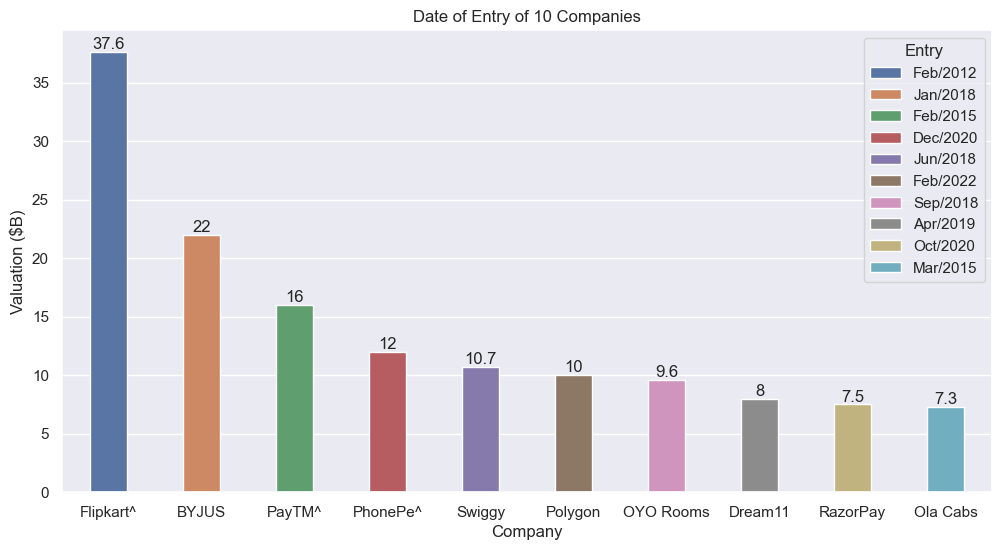

In [146]:
# Setting the style and labeling the plot
sns.set(style='darkgrid')
plt.figure(figsize=(12,6))
plt.title('Date of Entry of 10 Companies')

# using group by finding the top 10 company-date entry combination by highest valuations
company_entry=ius.groupby(['Company','Entry'])['Valuation ($B)'].sum().reset_index()

#sorting the data in descending order and displaying the top 10 results
company_entry_10=company_entry.sort_values(by='Valuation ($B)', ascending=False).head(10)

# creating a bar plot using seaborn
ax=sns.barplot(data=company_entry_10, x= 'Company', y='Valuation ($B)', hue='Entry', dodge=False, width=0.4)

# labeling the bars 
for bars in ax.containers:
    ax.bar_label(bars)


#### From the above plot, we can see that Flipkart is the oldest company, and other companies entered the market in the years ranging from 2015 to 2020

## 6. Number of Startups Year-Wise

In [167]:
# using group by finding the number of startups year-wise
startup_year_wise = ius.groupby('Entry')['Company'].nunique().head(10)
startup_year_wise

Entry
Apr/2015    1
Apr/2018    1
Apr/2019    1
Apr/2021    8
Aug/2016    1
Aug/2021    7
Aug/2022    1
Dec/2020    4
Dec/2021    3
Feb/2012    1
Name: Company, dtype: int64

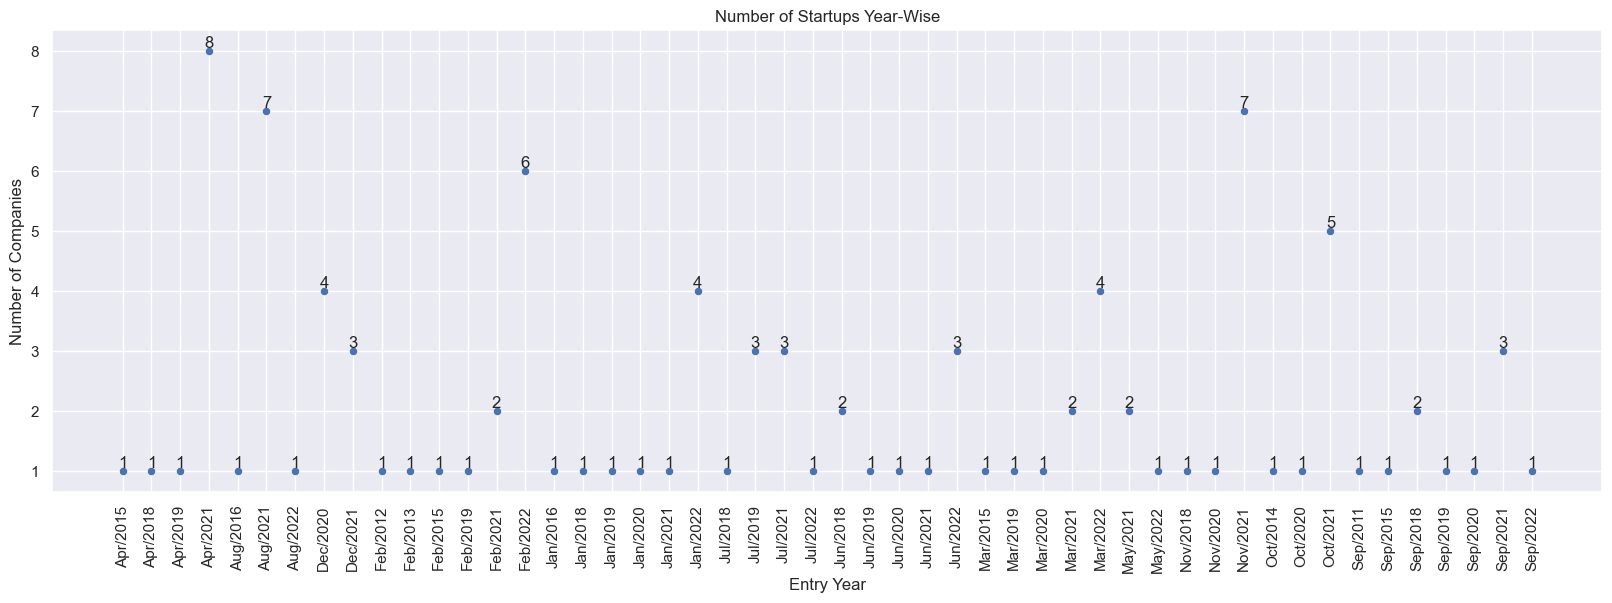

In [247]:
# Setting the style and labeling the plot
sns.set(style='darkgrid')
plt.figure(figsize=(20,6))
plt.title('Number of Startups Year-Wise')

# using group by finding the number of startups year-wise
startup_year_wise = ius.groupby('Entry')['Company'].nunique().reset_index()

# creating a scatter plot using seaborn
sns.scatterplot(data=startup_year_wise, x= 'Entry', y='Company')

for i, row in startup_year_wise.iterrows():
    plt.text(row['Entry'], row['Company'], f"{row['Company']}", ha='center', va='bottom')
    
# labeling and rotating the labels of the x-axis for better readability
plt.ylabel('Number of Companies')
plt.xlabel('Entry Year')
plt.xticks(rotation=90)
plt.show()

#### From the above plot we can see that maximum number of startups which entered the market were in Apr/21

## 7. Investors with Highest Valuations

In [200]:
# using group by finding the investors with highest valuation
investors_valuations=ius.groupby('Select Investors')['Valuation ($B)'].sum().reset_index()
investors_valuations_5=investors_valuations.sort_values(by='Valuation ($B)', ascending=False).head(7)
investors_valuations_5


,Select Investors,Valuation ($B)
14,"Accel, Tiger Global, Naspers, SoftBank, Tencent",37.6
2,"Aarin Capital, Sequoia Capital, Lightspeed Ven...",22.0
62,"Saama Capital, Elevation Capital, Alibaba, Ber...",16.0
97,"Tiger Global, Tencent",12.0
11,"Accel, Elevation Capital, Norwest, Naspers, Te...",10.7
26,"Coinbase Ventures, Sequoia Capital India, Tige...",10.0
48,"Lightspeed Ventures, Sequoia Capital, SoftBank",9.6


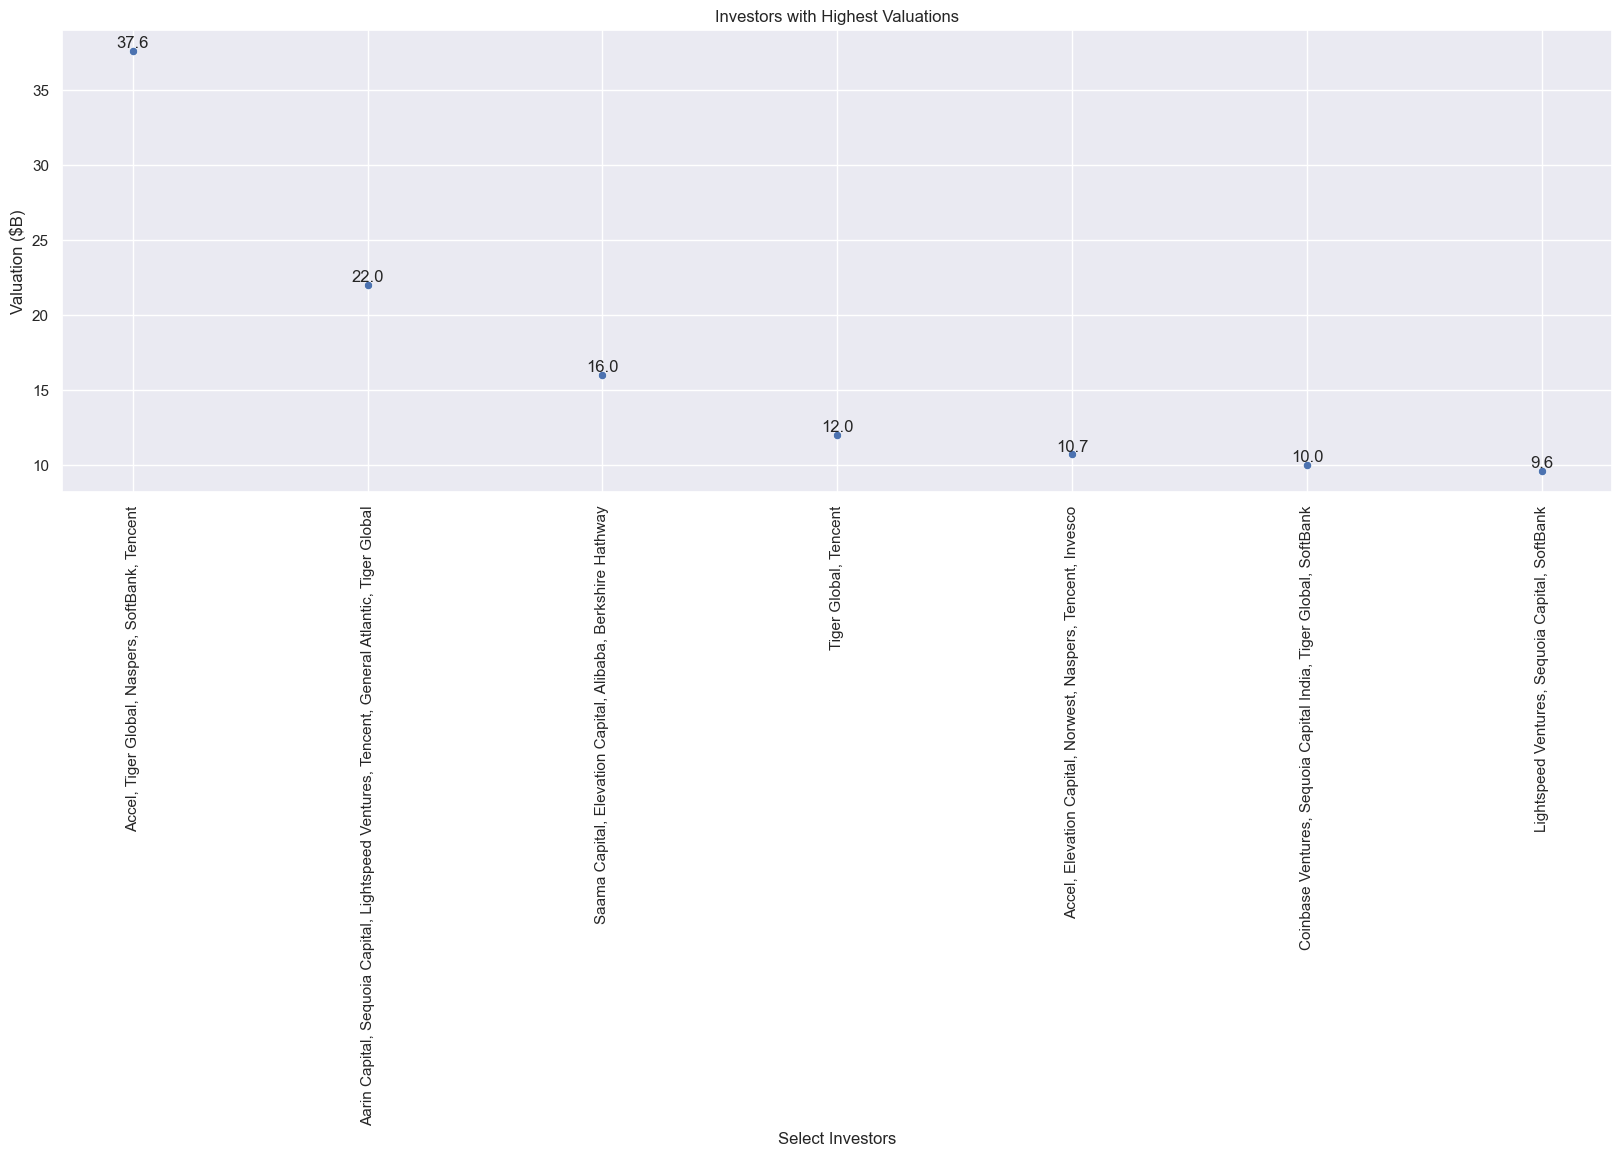

In [236]:
# Setting the style and labeling the plot
sns.set(style='darkgrid')
plt.figure(figsize=(20, 6))
plt.title('Investors with Highest Valuations')

# using group by finding the number of Investors with Highest Valuations
investors_valuations = ius.groupby('Select Investors')['Valuation ($B)'].sum().reset_index()

# sorting the data in descending order and displaying the top 7 results
investors_valuations_5 = investors_valuations.sort_values(by='Valuation ($B)', ascending=False).head(7)

# creating a scatter plot using seaborn
sns.scatterplot(data=investors_valuations_5, x='Select Investors', y='Valuation ($B)')

# labeling the data points with their values
for i, row in investors_valuations_5.iterrows():
    plt.text(row['Select Investors'], row['Valuation ($B)'], f'{row["Valuation ($B)"]}', ha='center', va='bottom')

# labeling and rotating the labels of the x-axis for better readability
plt.xticks(rotation=90)
plt.show()


#### From the above plot we can note that Tiger Global, Sequoia Capital and Soft Bank are the major investors in top sectors

## 8. Companies with Least Valuations

In [259]:
# using group by finding the top 5 company-sector combination by lowest valuations

company_sector= ius.groupby(['Company','Sector'])['Valuation ($B)'].sum().reset_index()
company_secotor_lv = company_sector.sort_values(by='Valuation ($B)',ascending=True).head()
company_secotor_lv

,Company,Sector,Valuation ($B)
8,Blinkit^,E-Commerce - Groceries,0.568
20,DarwinBox,SaaS - HR,1.000
1,Amagi Media Labs,SaaS - Local Ads Targeting,1.000
95,Vedantu,Edtech,1.000
86,Slice,Fintech - Credit Cards,1.000


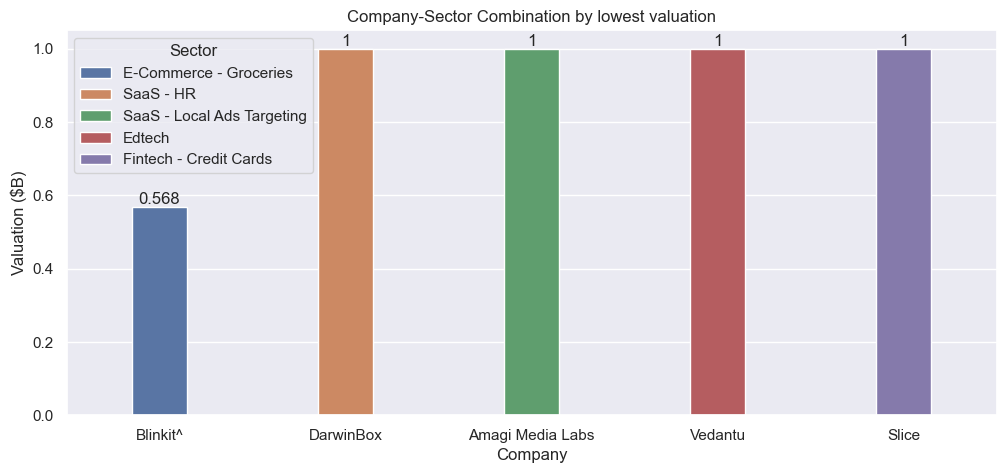

In [265]:
# Setting the style and labeling the plot

sns.set(style='darkgrid')
plt.figure(figsize=(12,5))
plt.title('Company-Sector Combination by lowest valuation')

# grouping data by company-sector combination with highest valuation
comapny_sector=ius.groupby(['Company','Sector'])['Valuation ($B)'].sum().reset_index()

#sorting the data in descending order and displaying the top 5 results
company_sector_lv=company_sector.sort_values(by='Valuation ($B)',ascending=True).head()

# creating a bar plot using seaborn
ax=sns.barplot(data=company_sector_lv, x='Company', y='Valuation ($B)', hue='Sector', dodge=False, width=0.3)

# labeling the bars 
for bars in ax.containers:
    ax.bar_label(bars)

#### From the above plot we can see that SaaS sector and Blinkit in E-commerce have the lowest valuations

### Inferences and Key Recommendations are mentioned in the PDF attached